In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tweet_classifier import ModelTrainer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('../data/lemmatizer_tfidf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4392 non-null   int64  
 1   target             4392 non-null   int64  
 2   word_count         4392 non-null   int64  
 3   stop_word_count    4392 non-null   int64  
 4   url_count          4392 non-null   int64  
 5   mean_word_length   4392 non-null   float64
 6   char_count         4392 non-null   int64  
 7   punctuation_count  4392 non-null   int64  
 8   tokens             4392 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 308.9+ KB


In [104]:
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df["tokens"].fillna(""))

X_num = StandardScaler().fit_transform(
    df.select_dtypes(include=[np.number]).drop(columns=["target"])
)

X = hstack([X_text, X_num])
y = df["target"].values
X.shape, y.shape

((4392, 9700), (4392,))

In [105]:
trainset, testset = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

ValueError: too many values to unpack (expected 2)

In [76]:
def preprocessing(df):
    X = df.drop('target', axis=1)
    y = df['target']
    print(X.shape, y.shape)
    return X, y

In [77]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

(3513, 7) (3513,)
(879, 7) (879,)


In [78]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [79]:
dict_of_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

In [80]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

LogisticRegression


ValueError: setting an array element with a sequence.

### Pipeline


==== LogisticRegression ====
[[726 148]
 [505 144]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       874
           1       0.49      0.22      0.31       649

    accuracy                           0.57      1523
   macro avg       0.54      0.53      0.50      1523
weighted avg       0.55      0.57      0.53      1523



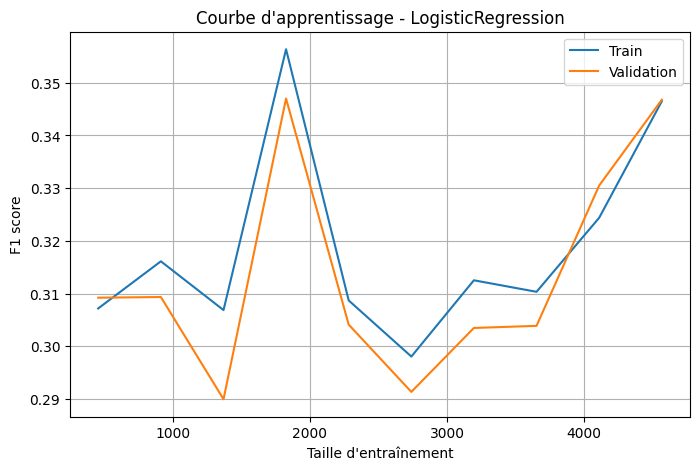


==== DecisionTree ====
[[645 229]
 [317 332]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.63      1523
weighted avg       0.64      0.64      0.64      1523



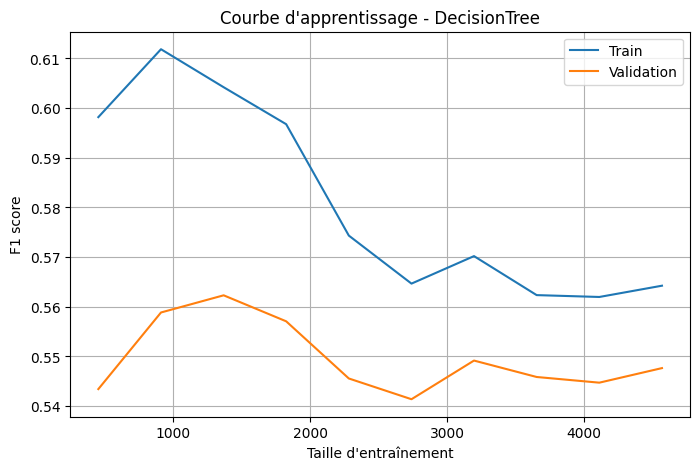


==== RandomForest ====
[[641 233]
 [316 333]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.62      1523
weighted avg       0.64      0.64      0.64      1523



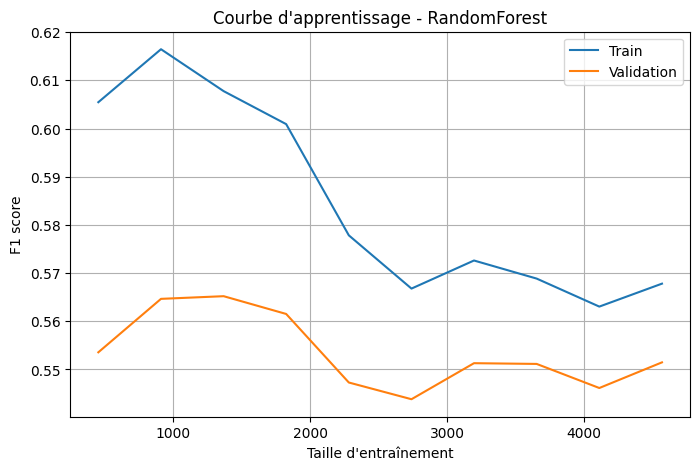


==== SVM ====
[[678 196]
 [330 319]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       874
           1       0.62      0.49      0.55       649

    accuracy                           0.65      1523
   macro avg       0.65      0.63      0.63      1523
weighted avg       0.65      0.65      0.65      1523



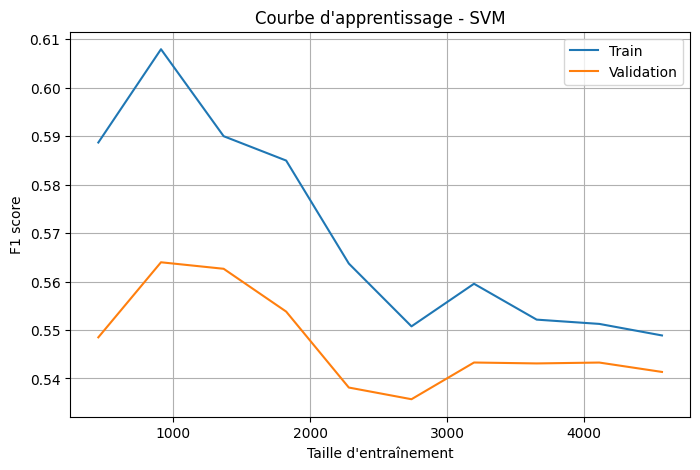


==== XGBoost ====
[[647 227]
 [315 334]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.60      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.63      0.63      1523
weighted avg       0.64      0.64      0.64      1523



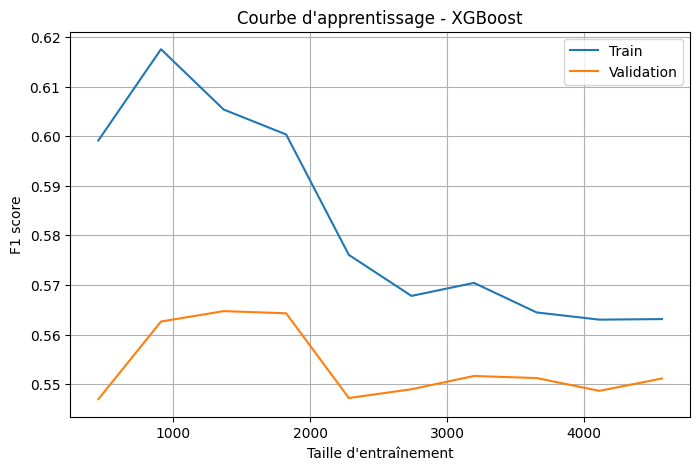

In [ ]:
# trainer = ModelTrainer(models)
# X, y = trainer.prepare_data("../data/test_code_modeling.csv")
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# for name, model in models.items():
#     trainer.evaluate_model(name, model, X_train, y_train, X_test, y_test)


In [ ]:
# chosen_model_name = "RandomForest"
# chosen_model = trainer.get_trained_model(chosen_model_name)

# === Fine-tuning de ce modèle ===
# param_grid = {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
# trainer.tune_model(chosen_model_name, param_grid, X_train, y_train)

# === Sauvegarde du modèle ===
# trainer.save_model(chosen_model_name, path="random_forest.pkl")

Modèle 'RandomForest' sauvegardé dans random_forest.pkl
